In [34]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np

## Standardize zfile

In [13]:
example_z_file = pd.read_csv('example/finemap_examples/finemap_data.z', sep=' ', header=None, names=['SNP', 'effect_size', 'PVE'])

In [15]:
effect_size_mean = example_z_file['effect_size'].mean()
effect_size_std = example_z_file['effect_size'].std()
example_z_file['z_score'] = (example_z_file['effect_size'] - effect_size_mean) / effect_size_std

In [16]:
example_z_file

,SNP,effect_size,PVE,z_score
0,rs1,-0.069441,0.023344,-0.767287
1,rs2,-0.004440,0.019757,-0.205991
2,rs3,0.047579,0.019637,0.243202
3,rs4,0.064748,0.019603,0.391454
4,rs5,-0.060098,0.019612,-0.686603
5,rs6,-0.018425,0.020219,-0.326752
6,rs7,0.629388,0.047490,5.267206
7,rs8,-0.102623,0.028024,-1.053814
8,rs9,-0.004995,0.021505,-0.210783
9,rs10,-0.089091,0.019207,-0.936969


In [18]:
example_z_file[['SNP', 'z_score']].to_csv('example/finemap_examples/finemap_data.standardized.z', index=False, header=False, sep=' ')
example_z_file['abs_z'] = example_z_file['z_score'].apply(abs)
example_z_file.sort_values('abs_z', ascending=False)f

## Gather Run Data

In [93]:
data_folder = 'sampling_run/'

data = []
for folder in os.listdir(data_folder):
	rho_file = data_folder + '/' + folder + '/rhos.tsv'
	time_file = data_folder + '/' + folder + '/time.txt'

	meta_info = re.match(r"i(\d+)_K(\d+)_r(\d+)", folder.split('/')[-1])
	n_iteration = int(meta_info.group(1))
	k = int(meta_info.group(2))
	run = int(meta_info.group(3))

	snp_selected = []
	with open(rho_file) as fp_read:
		fp_read.readline()
		fp_read.readline()
		for line in fp_read:
			info = line.replace('\n', '').split('\t')
			snp_selected.append(int(info[1]))

	with open(time_file) as fp_read:
		line = fp_read.readline().replace('\n', '')
		time = float(line)

	data_entry = {'n_iteration': n_iteration,
				  'k': 'k=' + str(k),
				  'run': run,
				  'SNPs': snp_selected,
				  'n_SNP': len(snp_selected),
				  'time': time}
	data.append(data_entry)

df = pd.DataFrame(data)

In [94]:
df

,n_iteration,k,run,SNPs,n_SNP,time
0,40,k=7,18,"[106, 142, 156, 3, 147, 146]",6,4.535
1,300,k=3,18,"[156, 164, 150, 151, 137]",5,21.355
2,700,k=5,3,"[156, 164, 150, 149, 22, 21, 18]",7,126.073
3,5,k=5,3,"[149, 218, 2, 153]",4,1.319
4,20,k=7,18,"[156, 55, 57]",3,1.931
...,...,...,...,...,...,...
985,40,k=7,16,"[156, 136, 78, 163, 162, 161, 160]",7,9.769
986,300,k=7,30,"[153, 166, 50, 161, 63, 126, 189]",7,78.845
987,400,k=3,2,"[153, 136, 161, 160, 162, 163, 150, 164]",8,24.631
988,300,k=5,13,"[127, 156, 153, 162, 22, 21, 18]",7,55.668


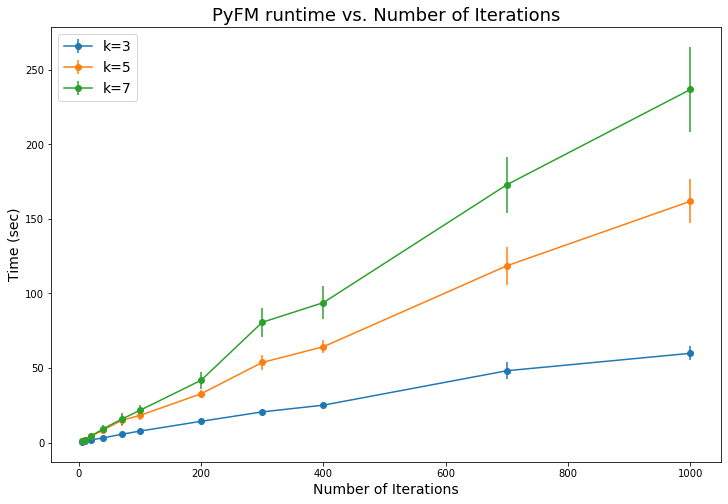

In [96]:
df_grouped = df.groupby(['n_iteration', 'k'])['time'].agg(['mean', 'std']).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

for k_val in df_grouped['k'].unique():
    df_k = df_grouped[df_grouped['k'] == k_val]
    ax.errorbar(df_k['n_iteration'], df_k['mean'], yerr=df_k['std'], fmt='o-', label=f'{k_val}')

ax.set_xlabel('Number of Iterations', fontsize=14)
ax.set_ylabel('Time (sec)', fontsize=14)
ax.set_title('PyFM runtime vs. Number of Iterations', fontsize=18)
ax.legend(fontsize=14)
fig.savefig('figs/runtime.png')

In [132]:
correct_SNPs = [153, 156, 166]

In [133]:
count_correct_SNPs = lambda row: sum(snp in correct_SNPs for snp in row['SNPs'])
df['correct_SNPs_count'] = df.apply(count_correct_SNPs, axis=1)
df['percent_SNP_capture'] = df['correct_SNPs_count'] / 3.0

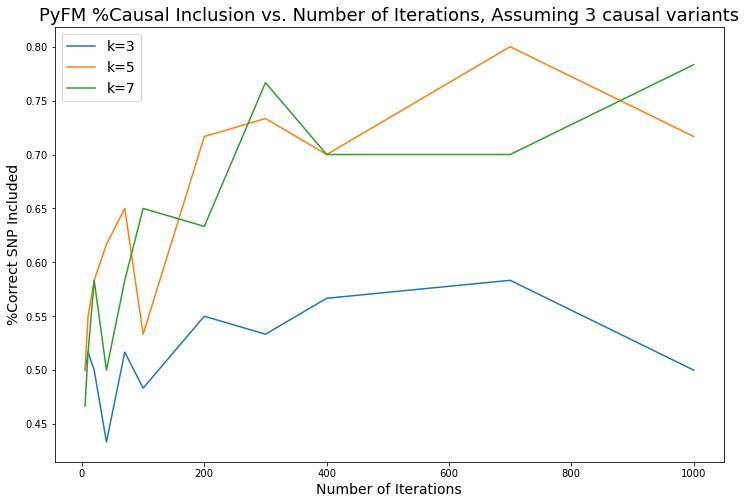

In [136]:
df_grouped = df.groupby(['n_iteration', 'k'])['percent_SNP_capture'].agg(['mean', 'std']).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

for k_val in df_grouped['k'].unique():
    df_k = df_grouped[df_grouped['k'] == k_val]
    ax.plot(df_k['n_iteration'], df_k['mean'], label=f'{k_val}')

ax.set_xlabel('Number of Iterations', fontsize=14)
ax.set_ylabel('%Correct SNP Included', fontsize=14)
ax.set_title('PyFM %Causal Inclusion vs. Number of Iterations, Assuming 3 causal variants', fontsize=18)
ax.legend(fontsize=14)
fig.savefig('figs/correct_vs_nitr.png')

/tmp/ipykernel_98862/2581183482.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_grouped = df_grouped.append(exhaustive, ignore_index=True)


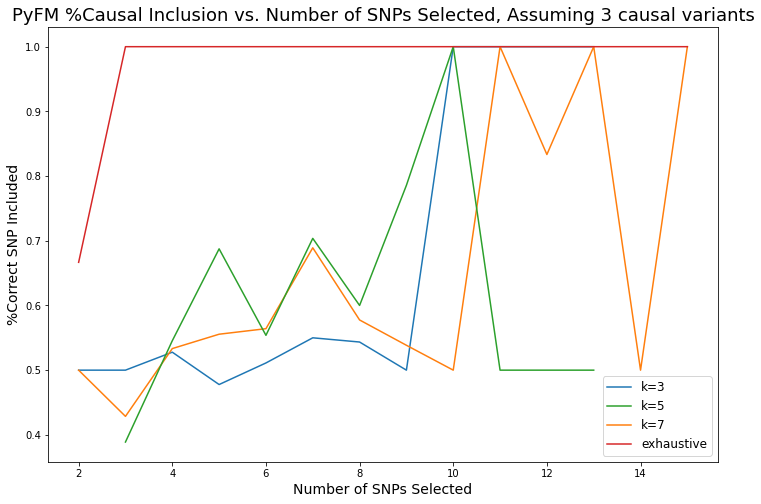

In [142]:
df_filtered = df[(df['n_iteration'] == 1000) | (df['n_iteration'] == 700)]
df_grouped = df.groupby(['n_SNP', 'k'])['percent_SNP_capture'].agg(['mean', 'std']).reset_index()
# df_grouped = df_grouped[~((df_grouped['n_SNP'] == 11) & (df_grouped['k'] == 'k=5'))]
exhaustive = []
for i in range(2, 16):
	if i < 3:
		new_exhaustive = {'n_SNP': i, 'k': 'exhaustive', 'mean': i / 3, 'std': 0}
	else:
		new_exhaustive = {'n_SNP': i, 'k': 'exhaustive', 'mean': 1, 'std': 0}
	exhaustive.append(new_exhaustive)
df_grouped = df_grouped.append(exhaustive, ignore_index=True)

fig, ax = plt.subplots(figsize=(12, 8))

for k_val in df_grouped['k'].unique():
    df_k = df_grouped[df_grouped['k'] == k_val]
    ax.plot(df_k['n_SNP'], df_k['mean'], label=f'{k_val}')

ax.set_xlabel('Number of SNPs Selected', fontsize=14)
ax.set_ylabel('%Correct SNP Included', fontsize=14)
ax.set_title('PyFM %Causal Inclusion vs. Number of SNPs Selected, Assuming 3 causal variants', fontsize=18)

legend_order = ['k=3', 'k=5', 'k=7', 'exhaustive']  # Example order: k=1, k=3, k=5, exhaustive
handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = legend_order
plt.legend(ordered_handles, ordered_labels, loc='lower right', fontsize='large')

fig.savefig('figs/correct_vs_nsnp.png')